In [3]:
import pandas as pd
import numpy as np
from google_play_scraper import reviews, Sort
from tqdm import tqdm

In [11]:
APP_ID = "com.zerodha.kite3"

all_reviews = []
continuation_token = None

for _ in tqdm(range(15)):
    result, continuation_token = reviews(
        APP_ID,
        lang="en",
        country="in",
        sort=Sort.NEWEST,
        count=200,
        continuation_token=continuation_token
    )
    
    all_reviews.extend(result)
    
    if continuation_token is None:
        break

print(f"Total reviews collected: {len(all_reviews)}")


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:07<00:00,  1.89it/s]

Total reviews collected: 3000


In [12]:
df = pd.DataFrame(all_reviews)

df = df[[
    "reviewId",
    "userName",
    "score",
    "content",
    "at",
    "thumbsUpCount",
    "reviewCreatedVersion"
]]

df.rename(columns={
    "content": "review_text",
    "at": "review_date",
    "score": "rating"
}, inplace=True)

df.head()


,reviewId,userName,rating,review_text,review_date,thumbsUpCount,reviewCreatedVersion
0,6f8f3b4c-35d2-4341-9643-db463224271c,Sujay Roy,5,very easy to use,2025-12-12 12:13:27,0,3.9.1
1,cb99c260-3937-42bd-a6f1-af4091f75681,Andy Singh,4,watchlist 7 se baadhao 10 se 15 karo kyuki zer...,2025-12-12 11:53:12,0,None
2,08b963e0-49f8-42d9-ae72-8aac0a65e081,sama _rahil,5,fantastic,2025-12-12 10:54:55,0,3.10.2
3,e63d683c-fbd6-443f-b043-e1f3817c329a,VARUN KUMAR,1,I am unable to install this app in my mobile,2025-12-12 10:33:28,0,None
4,e433065f-ccb0-492e-8d72-550e25e36fdb,rahul kumar,1,give option to type price directly instead of ...,2025-12-12 09:56:28,0,3.10.1


In [13]:
df["review_date"] = pd.to_datetime(df["review_date"])
df["review_text"] = df["review_text"].astype(str)

df = df.drop_duplicates(subset="reviewId")
df = df[df["review_text"].str.len() > 10]

print("Final shape:", df.shape)


Final shape: (2271, 7)


In [14]:
df.to_csv("../data/raw/zerodha_kite_reviews_raw.csv", index=False)


<Axes: title={'center': 'Weekly Review Volume (Exploratory)'}, xlabel='review_date'>

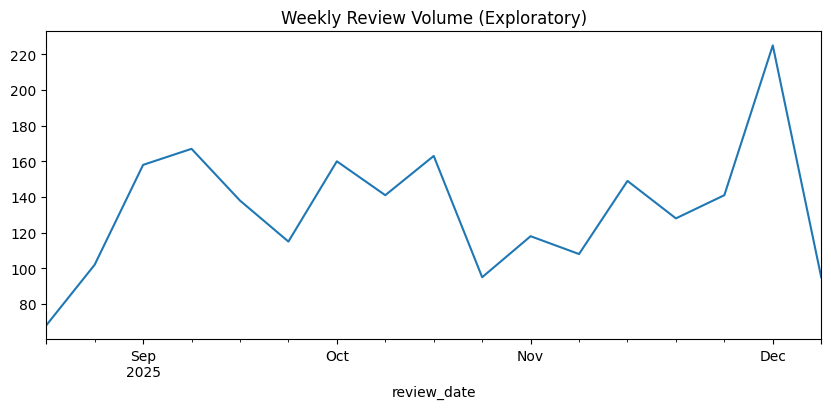

In [16]:
df["rating"].value_counts().sort_index()
df.set_index("review_date").resample("W").size().plot(
    title="Weekly Review Volume (Exploratory)",
    figsize=(10,4)
)